# Training a Convolutional Neural Network to distinguish 88 different category of doodles - v2

### Training on 5000 images from each category and testing on 1000 images from each category

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
classifier = Sequential()

# first conv layer
classifier.add(Convolution2D(
        input_shape=(140,140,1),
        filters=16,
        kernel_size=(3,3),
        activation='relu',
        kernel_initializer='uniform'))

# max pooling layer
classifier.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)))

# third conv layer
classifier.add(Convolution2D(
        filters=16,
        kernel_size=(3,3),
        activation='relu',
        kernel_initializer='uniform'))

# max pooling layer
classifier.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)))

# max pooling layer
classifier.add(MaxPooling2D(
        pool_size=(2,2),
        strides=(2,2)))

# flattening for feeding the data to a fully connected artificial neural network
classifier.add(Flatten())

# first hidden layer
classifier.add(Dense(units=128, activation='relu', kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.4))

# output layer
classifier.add(Dense(units=88, activation='softmax', kernel_initializer='uniform'))

# compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Get the Testing and Training Dataset from my github repo

In [0]:
! rm -rf dataset
! git clone https://github.com/jp-test-account/dataset.git

Cloning into 'dataset'...
remote: Enumerating objects: 96996, done.
remote: Counting objects: 100% (96996/96996), done.
remote: Compressing objects: 100% (96979/96979), done.
remote: Total 96996 (delta 18), reused 96995 (delta 17), pack-reused 0
Receiving objects: 100% (96996/96996), 206.97 MiB | 12.88 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Checking out files: 100% (96888/96888), done.


In [0]:
! ls

cat-dog-dataset  dataset  final-model.h5  gdrive  sample_data


In [0]:
! cd dataset && python npy-to-png.py dataset-5000 5000

Pulling 5000 images from sea_turtle.npy... Done
Pulling 5000 images from brain.npy... Done
Pulling 5000 images from radio.npy... Done
Pulling 5000 images from scissors.npy... Done
Pulling 5000 images from whale.npy... Done
Pulling 5000 images from leg.npy... Done
Pulling 5000 images from tiger.npy... Done
Pulling 5000 images from washing_machine.npy... Done
Pulling 5000 images from ceiling_fan.npy... Done
Pulling 5000 images from wine_glass.npy... Done
Pulling 5000 images from ant.npy... Done
Pulling 5000 images from dragon.npy... Done
Pulling 5000 images from onion.npy... Done
Pulling 5000 images from lion.npy... Done
Pulling 5000 images from The_Mona_Lisa.npy... Done
Pulling 5000 images from pig.npy... Done
Pulling 5000 images from necklace.npy... Done
Pulling 5000 images from mermaid.npy... Done
Pulling 5000 images from face.npy... Done
Pulling 5000 images from duck.npy... Done
Pulling 5000 images from rain.npy... Done
Pulling 5000 images from zigzag.npy... Done
Pulling 5000 images 

In [0]:
! cd dataset && ls

dataset-100  dataset-1000  dataset-5000  npy-to-png.py	raw-dataset-5000


In [4]:
# image preprocessing before feeding into the CNN
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# training data set
train_set = data_generator.flow_from_directory(
        'dataset/dataset-5000/',
        batch_size=32,
        target_size=(140,140), color_mode='grayscale', subset='training')

# testing/validation data set
test_set = data_generator.flow_from_directory(
        'dataset/dataset-5000/',
        batch_size=32,
        target_size=(140,140), color_mode='grayscale', subset='validation')


Found 352000 images belonging to 88 classes.
Found 88000 images belonging to 88 classes.


## Epoch 1 - 5

In [5]:
# finally fitting the data and training the CNN
history = classifier.fit_generator(
        epochs=5,
        initial_epoch=0,
        generator=train_set,
        steps_per_epoch=10000,
        validation_data=test_set,
        validation_steps=1000,
        use_multiprocessing=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
10000/10000 [==============================] - 278s 28ms/step - loss: 2.2783 - acc: 0.4332 - val_loss: 1.5553 - val_acc: 0.6213
Epoch 2/5
10000/10000 [==============================] - 275s 28ms/step - loss: 1.7372 - acc: 0.5594 - val_loss: 1.3178 - val_acc: 0.6686
Epoch 3/5
10000/10000 [==============================] - 270s 27ms/step - loss: 1.5907 - acc: 0.5953 - val_loss: 1.2506 - val_acc: 0.6857
Epoch 4/5
10000/10000 [==============================] - 271s 27ms/step - loss: 1.5061 - acc: 0.6161 - val_loss: 1.2504 - val_acc: 0.6892
Epoch 5/5
10000/10000 [==============================] - 273s 27ms/step - loss: 1.4622 - acc: 0.6258 - val_loss: 1.1976 - val_acc: 0.6944


KeyboardInterrupt: ignored

## Epoch 5 - 10

In [12]:
# finally fitting the data and training the CNN
history = classifier.fit_generator(
        epochs=10,
        initial_epoch=5,
        generator=train_set,
        steps_per_epoch=10000,
        validation_data=test_set,
        validation_steps=1000,
        use_multiprocessing=True)

Epoch 6/10
10000/10000 [==============================] - 273s 27ms/step - loss: 1.4157 - acc: 0.6369 - val_loss: 1.1755 - val_acc: 0.7054
Epoch 7/10
10000/10000 [==============================] - 271s 27ms/step - loss: 1.3839 - acc: 0.6439 - val_loss: 1.1535 - val_acc: 0.7076
Epoch 8/10
10000/10000 [==============================] - 271s 27ms/step - loss: 1.3624 - acc: 0.6482 - val_loss: 1.1442 - val_acc: 0.7112
Epoch 9/10
10000/10000 [==============================] - 269s 27ms/step - loss: 1.3416 - acc: 0.6542 - val_loss: 1.1525 - val_acc: 0.7138
Epoch 10/10
10000/10000 [==============================] - 270s 27ms/step - loss: 1.3232 - acc: 0.6568 - val_loss: 1.1160 - val_acc: 0.7157


KeyboardInterrupt: ignored

## Epoch 10 - 15

In [16]:
# finally fitting the data and training the CNN
history = classifier.fit_generator(
        epochs=15,
        initial_epoch=10,
        generator=train_set,
        steps_per_epoch=10000,
        validation_data=test_set,
        validation_steps=1000,
        use_multiprocessing=True)

Epoch 11/15
10000/10000 [==============================] - 269s 27ms/step - loss: 1.3120 - acc: 0.6597 - val_loss: 1.1473 - val_acc: 0.7140
Epoch 12/15
10000/10000 [==============================] - 266s 27ms/step - loss: 1.2997 - acc: 0.6629 - val_loss: 1.1316 - val_acc: 0.7148
Epoch 13/15
10000/10000 [==============================] - 270s 27ms/step - loss: 1.2883 - acc: 0.6653 - val_loss: 1.1453 - val_acc: 0.7147
Epoch 14/15
10000/10000 [==============================] - 265s 27ms/step - loss: 1.2801 - acc: 0.6675 - val_loss: 1.1413 - val_acc: 0.7149
Epoch 15/15
10000/10000 [==============================] - 266s 27ms/step - loss: 1.2703 - acc: 0.6687 - val_loss: 1.1028 - val_acc: 0.7200


KeyboardInterrupt: ignored

In [19]:
# finally fitting the data and training the CNN
history = classifier.fit_generator(
        epochs=20,
        initial_epoch=15,
        generator=train_set,
        steps_per_epoch=10000,
        validation_data=test_set,
        validation_steps=1000,
        use_multiprocessing=True)

Epoch 16/20
10000/10000 [==============================] - 267s 27ms/step - loss: 1.2695 - acc: 0.6686 - val_loss: 1.1472 - val_acc: 0.7125
Epoch 17/20
10000/10000 [==============================] - 267s 27ms/step - loss: 1.2616 - acc: 0.6708 - val_loss: 1.1132 - val_acc: 0.7193
Epoch 18/20
10000/10000 [==============================] - 268s 27ms/step - loss: 1.2567 - acc: 0.6715 - val_loss: 1.1500 - val_acc: 0.7137
Epoch 19/20
10000/10000 [==============================] - 266s 27ms/step - loss: 1.2489 - acc: 0.6744 - val_loss: 1.1497 - val_acc: 0.7132
Epoch 20/20
10000/10000 [==============================] - 265s 27ms/step - loss: 1.2406 - acc: 0.6740 - val_loss: 1.1052 - val_acc: 0.7218


KeyboardInterrupt: ignored

In [20]:
# finally fitting the data and training the CNN
history = classifier.fit_generator(
        epochs=25,
        initial_epoch=20,
        generator=train_set,
        steps_per_epoch=10000,
        validation_data=test_set,
        validation_steps=1000,
        use_multiprocessing=True)

Epoch 21/25
10000/10000 [==============================] - 269s 27ms/step - loss: 1.2431 - acc: 0.6734 - val_loss: 1.1649 - val_acc: 0.7065
Epoch 22/25
10000/10000 [==============================] - 267s 27ms/step - loss: 1.2390 - acc: 0.6753 - val_loss: 1.1263 - val_acc: 0.7173
Epoch 23/25
10000/10000 [==============================] - 265s 27ms/step - loss: 1.2367 - acc: 0.6748 - val_loss: 1.1239 - val_acc: 0.7193
Epoch 24/25
10000/10000 [==============================] - 269s 27ms/step - loss: 1.2299 - acc: 0.6770 - val_loss: 1.1483 - val_acc: 0.7148
Epoch 25/25
10000/10000 [==============================] - 270s 27ms/step - loss: 1.2239 - acc: 0.6771 - val_loss: 1.1179 - val_acc: 0.7196


KeyboardInterrupt: ignored

In [0]:
# saving the trained model
model_name = 'model-140-v2-7200.h5'
classifier.save(model_name)

In [18]:
! cp model-140-v2-7200.h5 gdrive/My\ Drive/ && ls

cat-dog-dataset  gdrive		  model-140-v2-6944.h5	model-140-v2-7200.h5
dataset		 model-140-v1.h5  model-140-v2-7157.h5	sample_data


Predicted Class 34
Probability:  0.9977437


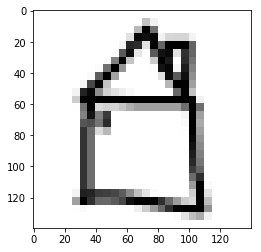

In [8]:
# predicting images
from keras.preprocessing import image
import numpy as np

img = image.load_img('dataset/dataset-100/house/104828.png', target_size=(140, 140), color_mode='grayscale')
img = image.img_to_array(img)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img.reshape(140,140), cmap='gray')

img = np.expand_dims(img, axis=0)
img = img/255.

index = classifier.predict_classes(img)[0]
print('Predicted Class', index)
print('Probability: ', classifier.predict(img)[0][index])

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
! cp model-140-v1.h5 gdrive/My\ Drive/

## Training Again, hoping to improve accuracy

In [83]:
# image preprocessing before feeding into the CNN
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# training data set
train_set = data_generator.flow_from_directory(
        'dataset/dataset-1000/',
        batch_size=8,
        target_size=(140,140), color_mode='grayscale', subset='training')

# testing/validation data set
test_set = data_generator.flow_from_directory(
        'dataset/dataset-1000/',
        batch_size=8,
        target_size=(140,140), color_mode='grayscale', subset='validation')


# finally fitting the data and training the CNN
history = classifier.fit_generator(
        epochs=10,
        initial_epoch=5,
        generator=train_set,
        steps_per_epoch=1000,
        validation_data=test_set,
        validation_steps=100,
        use_multiprocessing=True)

Found 70400 images belonging to 88 classes.
Found 17599 images belonging to 88 classes.
Epoch 6/10
1000/1000 [==============================] - 18s 18ms/step - loss: 1.2540 - acc: 0.6748 - val_loss: 1.1127 - val_acc: 0.7212
Epoch 7/10
1000/1000 [==============================] - 18s 18ms/step - loss: 1.2233 - acc: 0.6889 - val_loss: 1.1323 - val_acc: 0.7025
Epoch 8/10
1000/1000 [==============================] - 17s 17ms/step - loss: 1.2174 - acc: 0.6886 - val_loss: 1.2513 - val_acc: 0.6887
Epoch 9/10
1000/1000 [==============================] - 17s 17ms/step - loss: 1.1797 - acc: 0.6966 - val_loss: 1.2019 - val_acc: 0.7013
Epoch 10/10
1000/1000 [==============================] - 18s 18ms/step - loss: 1.1646 - acc: 0.7026 - val_loss: 1.1199 - val_acc: 0.7188


## Epoch 20 - 30

In [85]:
# finally fitting the data and training the CNN
history = classifier.fit_generator(
        epochs=20,
        initial_epoch=10,
        generator=train_set,
        steps_per_epoch=10000,
        validation_data=test_set,
        validation_steps=1000,
        use_multiprocessing=True)

Epoch 11/20
10000/10000 [==============================] - 175s 17ms/step - loss: 0.9119 - acc: 0.7665 - val_loss: 1.2671 - val_acc: 0.6983
Epoch 12/20
 5655/10000 [===============>..............] - ETA: 1:13 - loss: 0.7293 - acc: 0.8025

Process ForkPoolWorker-21:
Process ForkPoolWorker-20:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/

KeyboardInterrupt: ignored